In [2]:
%load_ext autoreload
%autoreload 2
import gym
import torch
from torch import nn
import dqn
import pprint
from matplotlib import pyplot as plt

In [3]:
def run(agent, env):
    
    pprint.pprint(agent.__dict__)
    
    qnet, reward_history, loss_history = dqn.learn(env, agent)
    
    plt.plot(reward_history)
    plt.show()
    
    plt.plot(loss_history)
    plt.show()
    
    dqn.play(env, agent, qnet)
    
    env.close()
    return qnet, reward_history, loss_history


{'batch_size': 8,
 'demo_interval': 30,
 'discount': 0.99,
 'epochs': 1,
 'greedy_epsilon_decay': 0.1,
 'greedy_epsilon_max': 1.0,
 'greedy_epsilon_min': 0.0001,
 'log_interval': 1000,
 'n_batches': 4,
 'n_episodes': 500,
 'n_steps': 500000,
 'n_steps_to_start_training': 200,
 'optim_beta_m': 0.9,
 'optim_beta_v': 0.999,
 'optim_epsilon': 1e-08,
 'optim_lr': 0.001,
 'priority_alpha': 0,
 'priority_epsilon': 0,
 'softmax_temperature': 0.001,
 'store_size': 50000,
 'target_update_interval': 1,
 'timeout': 1000,
 'timeout_reward': -1000}
input:9, output:4
-----
step #1000, num episodes played: 7, store size: 1000 
loss: 6.6489, last 7 episodes avg=-237.591 best=-3.8413 worst=-471.6389
-----
step #2000, num episodes played: 12, store size: 2000 
loss: 6.515, last 10 episodes avg=-270.8356 best=-3.8413 worst=-875.586
-----
step #3000, num episodes played: 17, store size: 3000 
loss: 5.1297, last 10 episodes avg=-231.251 best=-39.497 worst=-875.586
-----
step #4000, num episodes played: 20, 

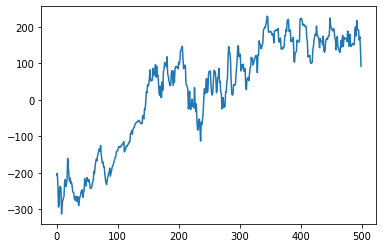

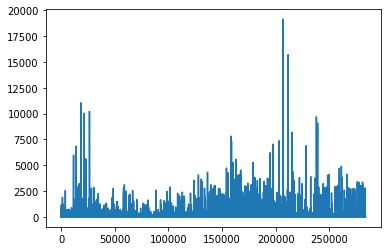

In [13]:
env = gym.make('LunarLander-v2')
# env = gym.make('CartPole-v0')


agent = dqn.Agent(
    discount=0.99,
    softmax_temperature=0.001,

    greedy_epsilon_max=1.0,
    greedy_epsilon_decay=0.1,
    greedy_epsilon_min=1e-4,
    priority_epsilon=0,
    priority_alpha=0,

    store_size=50000,
    n_steps=500000,
    n_episodes=500,

    target_update_interval=1,
    n_steps_to_start_training=200,

    log_interval=1000,
    demo_interval=30,

    timeout=1000,
    # 250
    timeout_reward=-1000,

    optim_lr=1e-3,
    optim_beta_m=0.9,
    optim_beta_v=0.999,
    optim_epsilon=1e-8,
    
    n_batches=4,
    batch_size=8,
    # 60
    epochs=1, # descend iterations each batch
)

qnet, reward_history, loss_history = run(agent, env)

In [15]:
dqn.play(env, agent, qnet, render=True)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0]


-4.314801863596102

In [17]:
from datetime import datetime
now = datetime.now().strftime("%Y-%m-%d-%H-%M")
torch.save(qnet.state_dict(), './models/LunarLander-v2-' + now)
print(now)

2020-06-06-01-02


In [19]:
qnet = nn.Sequential(
        nn.Linear(9, 256),
        nn.ReLU(),
        nn.Linear(256, 4)
    )
qnet.load_state_dict(torch.load('./models/LunarLander-v2-' + now))
qnet.eval()

Sequential(
  (0): Linear(in_features=9, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=4, bias=True)
)

In [30]:
agent = dqn.Agent(
    discount=0.99,
    softmax_temperature=0.001,

    greedy_epsilon_max=1.0,
    greedy_epsilon_decay=0.1,
    greedy_epsilon_min=1e-4,
    priority_epsilon=0,
    priority_alpha=0,

    store_size=50000,
    n_steps=300000,
    n_episodes=300,

    target_update_interval=1,
    n_steps_to_start_training=200,

    log_interval=1000,
    demo_interval=30,

    timeout=1000,
    timeout_reward=-1000,

    optim_lr=0.001,
    optim_beta_m=0.9,
    optim_beta_v=0.999,
    optim_epsilon=1e-8,
    
    n_batches=4,
    batch_size=8,
    epochs=1, # descend iterations each batch
)
env = gym.make('LunarLander-v2')
dqn.play(env, agent, qnet, render=True)

[1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 3, 0, 2, 0, 0, 2, 2, 0, 0, 2, 3, 0, 2, 0, 2, 2, 0, 3, 2, 3, 2, 3, 2, 0, 0, 2, 0, 3, 3, 3, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 3, 3, 1, 2, 3, 2, 2, 2, 1, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


279.157194570524